In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("HousingData.csv")
data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59,24.8
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
245,0.19133,22.0,NaN,NaN,0.431,5.605,70.2,7.9549,7,330,19.1,389.13,18.46,18.5
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.43,24.3
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27,19.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [3]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

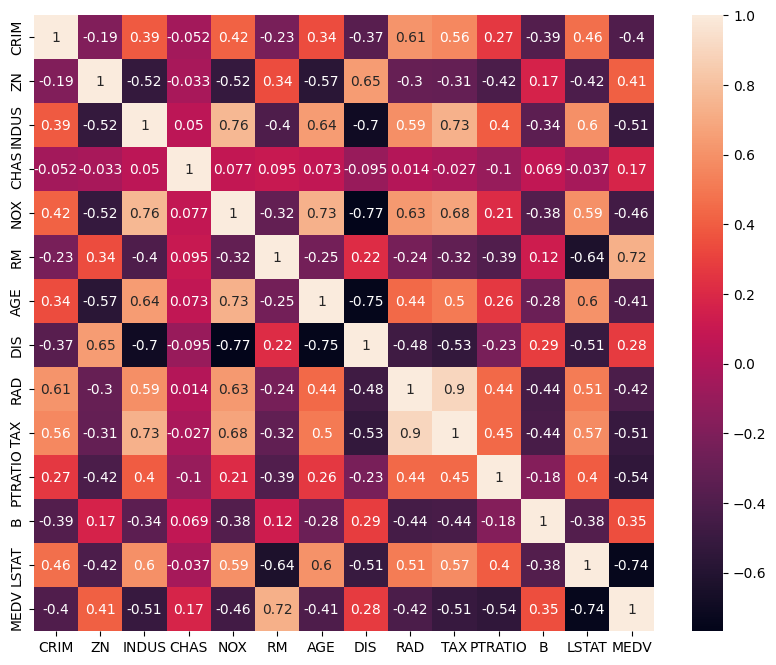

In [6]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [7]:
imp_features = ['CHAS', 'RM', 'ZN', 'LSTAT', 'PTRATIO', 'TAX']
x = data[imp_features]
y = data['MEDV']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=16, verbose=True)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 526.3568 - mae: 21.4153 - val_loss: 571.6711 - val_mae: 21.9371
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 443.2159 - mae: 19.3125 - val_loss: 368.0849 - val_mae: 17.0955
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 257.6519 - mae: 13.6035 - val_loss: 61.5493 - val_mae: 6.1106
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 54.1722 - mae: 5.9319 - val_loss: 39.1795 - val_mae: 4.3147
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.1836 - mae: 3.9347 - val_loss: 33.7104 - val_mae: 3.9540
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4337 - mae: 3.2192 - val_loss: 32.1617 - val_mae: 3.8700
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4259 - mae: 3.1120 - val_loss: 30.4105 - val_mae: 3.6854
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7839 - mae: 3.1331 - val_loss: 29.6402 - val_mae: 3.5934
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━

In [13]:
test_loss, test_mae = model.evaluate(x_test, y_test )
print("Mean Absolute Error : ", test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2589 - mae: 2.7695
Mean Absolute Error :  2.590441942214966


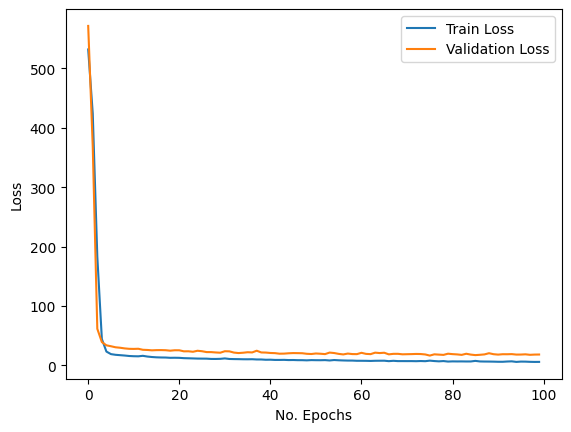

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('No. Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(x_test)
test_mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error : ", test_mse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mean Squared Error :  18.218333229113103


In [16]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)

print("\n MAE : ", MAE)
print("\n MSE : ", MSE)
print("\n R2 Score : ", r2)
# print("\n Accuracy : ", acc)


 MAE :  2.590442167009625

 MSE :  18.218333229113103

 R2 Score :  0.8047071988468257


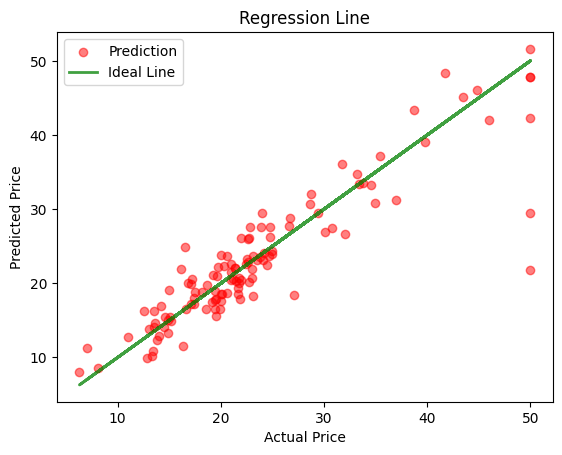

In [17]:
plt.scatter(y_test, y_pred, color='red', label='Prediction', alpha=0.5)
plt.plot(y_test, y_test, color='green', label='Ideal Line', linewidth='2', alpha=0.75)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression Line')
plt.legend()
plt.show()